# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [5]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 250

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 250 total reviews
Scraping page 2
   ---> 500 total reviews
Scraping page 3
   ---> 750 total reviews
Scraping page 4
   ---> 1000 total reviews
Scraping page 5
   ---> 1250 total reviews
Scraping page 6
   ---> 1500 total reviews
Scraping page 7
   ---> 1750 total reviews
Scraping page 8
   ---> 2000 total reviews
Scraping page 9
   ---> 2250 total reviews
Scraping page 10
   ---> 2500 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | My wife and I are very disappo...
1,Not Verified | We flew BA between Heathrow an...
2,Not Verified | Absolutely disgusted with BA. ...
3,Not Verified | Took a trip to Nashville with m...
4,Not Verified | A nightmare journey courtesy o...


In [8]:
# Create 'data' directory if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")

# Save the DataFrame to CSV
df.to_csv("data/BA_reviews.csv", index=False)


Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
df


,reviews
0,Not Verified | My wife and I are very disappo...
1,Not Verified | We flew BA between Heathrow an...
2,Not Verified | Absolutely disgusted with BA. ...
3,Not Verified | Took a trip to Nashville with m...
4,Not Verified | A nightmare journey courtesy o...
...,...
2495,Tel Aviv to London Heathrow with British Airwa...
2496,✅ Verified Review | London Gatwick to Rome Fi...
2497,✅ Verified Review | Washington to Dubai retur...
2498,Miami to Manchester via London Heathrow with B...


# **Data Cleaning**

We will clean the data to remove the "✅ Trip Verified" text, then convert the text into lower-case, and remove all the punctuation marks from the data. This is essential as punctuation marks do not add any meaningful value for the analysis.

In [10]:
df["reviews"] = df["reviews"].str.split("|", expand=True)[1]
df.head()

,reviews
0,My wife and I are very disappointed with fly...
1,We flew BA between Heathrow and Berlin one w...
2,Absolutely disgusted with BA. Our flights we...
3,Took a trip to Nashville with my wife for a l...
4,A nightmare journey courtesy of British Airw...


In [11]:
df["reviews"] = df["reviews"].fillna("")


In [12]:
import string

def case_and_punctuation_handling(text):
    lower_case_text = text.lower()
    cleaned_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))
    return cleaned_text

df["cleaned_reviews"] = df["reviews"].apply(case_and_punctuation_handling)
df.head()

,reviews,cleaned_reviews
0,My wife and I are very disappointed with fly...,my wife and i are very disappointed with fly...
1,We flew BA between Heathrow and Berlin one w...,we flew ba between heathrow and berlin one w...
2,Absolutely disgusted with BA. Our flights we...,absolutely disgusted with ba our flights wer...
3,Took a trip to Nashville with my wife for a l...,took a trip to nashville with my wife for a l...
4,A nightmare journey courtesy of British Airw...,a nightmare journey courtesy of british airw...


In [13]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')


In [14]:
df.sample

<bound method NDFrame.sample of                                                 reviews  \
0       My wife and I are very disappointed with fly...   
1       We flew BA between Heathrow and Berlin one w...   
2       Absolutely disgusted with BA. Our flights we...   
3      Took a trip to Nashville with my wife for a l...   
4       A nightmare journey courtesy of British Airw...   
...                                                 ...   
2495                                                      
2496    London Gatwick to Rome Fiumicino. If anyone ...   
2497    Washington to Dubai return via Heathrow, on ...   
2498                                                      
2499                                                      

                                        cleaned_reviews  
0       my wife and i are very disappointed with fly...  
1       we flew ba between heathrow and berlin one w...  
2       absolutely disgusted with ba our flights wer...  
3      took a trip to nashv

## **Checking for Null values**

In [15]:
df.isnull().value_counts()

reviews  cleaned_reviews
False    False              2500
Name: count, dtype: int64

 There are two missing values for country. For this we can just remove those two reviews (rows) from the dataframe.

In [16]:
#drop the rows using index where the country value is null
df.drop(df[df.isnull() == True].index, axis=0, inplace=True)

In [17]:
df.shape

(0, 2)

In [18]:
#resetting the index
df.reset_index(drop=True)

,reviews,cleaned_reviews


In [19]:
import os

cwd = os.getcwd()  # Get the current working directory
df.to_csv(os.path.join(cwd, "cleaned-BA-reviews.csv"))


In [37]:
df.to_csv(cwd + "/cleaned-BA-reviews.csv")

# **Tokenization**

*Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization). The process refers to the process of converting a sequence of text into smaller parts, known as tokens. So here, we will tokenize our text data to convert it into smaller tokens(or words).*

*Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.*

In [21]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
import pandas as pd
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet


In [23]:
data = {'cleaned_reviews': ["This is a sample review.", "Another review text here."]}
df = pd.DataFrame(data)


In [24]:
try:
    df["POS_tagged_reviews"] = df["cleaned_reviews"].apply(handle_tokenization_stopwords_postags)
    print(df.head())
except Exception as e:
    print("An error occurred:", e)


An error occurred: name 'handle_tokenization_stopwords_postags' is not defined


In [25]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet

In [26]:
def handle_tokenization_stopwords_postags(text):
    # Tokenization
    tokenized_text = word_tokenize(text)
    # POS-tagging
    tags = pos_tag(tokenized_text)
    new_text_list = []
    for word, tag in tags:
        # Stopword removal
        if word not in stopwords.words("english"):
            pos = pos_dict.get(tag[0], None)  # Default to None if no match
            new_text_list.append((word, pos))
    return new_text_list


 # **Lemmatization**

*Lemmatization process here as Stemming often gives some meaningless root words as it simply chops off some characters in the end, whereas, Lemmatization gives meaningful root words.*

In [27]:

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def text_lemmatization(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df["lemmatized_reviews"] = df["POS_tagged_reviews"].apply(text_lemmatization)
df.head()


KeyError: 'POS_tagged_reviews'

# **Sentiment Analysis**

***VADER** (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analyzer that has been trained on social media text. Here, SentimentIntensityAnalyzer() is an object and polarity_scores is a method which will give us scores*

In [28]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
# POS tagging dictionary.
pos_dict = {"J":wordnet.ADJ, "V":wordnet.VERB, "N":wordnet.NOUN, "R":wordnet.ADV}

def handle_tokenization_stopwords_postags(text):
    # Tokenization.
    tokenized_text = word_tokenize(text)
    # POS-tagging.
    tags = pos_tag(tokenized_text)
    new_text_list = []
    for word, tag in tags:
        # Stopword removal.
        if word not in stopwords.words("english"):
          new_text_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_text_list 

df["POS_tagged_reviews"] = df["cleaned_reviews"].apply(handle_tokenization_stopwords_postags)
df.head()

,cleaned_reviews,POS_tagged_reviews
0,This is a sample review.,"[(This, None), (sample, a), (review, n), (., N..."
1,Another review text here.,"[(Another, None), (review, n), (text, n), (., ..."


In [36]:
df.to_csv("data/BA_reviews_analysed.csv")

# **Data Visualization. Pie Chart**

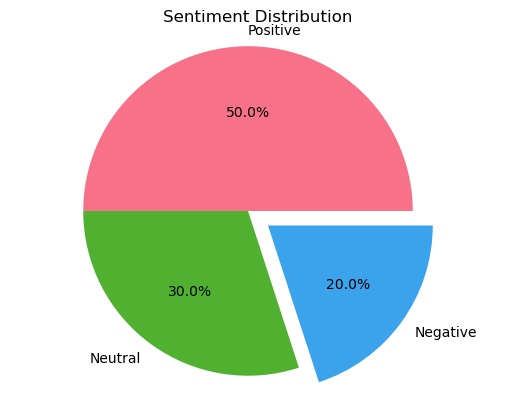

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data for testing
sentiment_counts = pd.Series([50, 30, 20], index=["Positive", "Neutral", "Negative"])

# Define Seaborn color palette to use.
palette_color = sns.color_palette("husl", 3)  # Adjust the palette as needed

# Plotting data on chart
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, colors=palette_color, explode=(0, 0, 0.15), autopct="%.1f%%")

# Displaying chart
plt.title('Sentiment Distribution')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()



# **Word Cloud Visualization**

In [58]:
print(df.columns)


Index(['cleaned_reviews', 'POS_tagged_reviews', 'lemmatized_reviews'], dtype='object')


In [59]:
print(df.head())


             cleaned_reviews  \
0   This is a sample review.   
1  Another review text here.   

                                  POS_tagged_reviews  \
0  [(This, None), (sample, a), (review, n), (., N...   
1  [(Another, None), (review, n), (text, n), (., ...   

          lemmatized_reviews  
0   This is a sample review.  
1  Another review text here.  


In [60]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming you have a 'cleaned_reviews' column
df['lemmatized_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


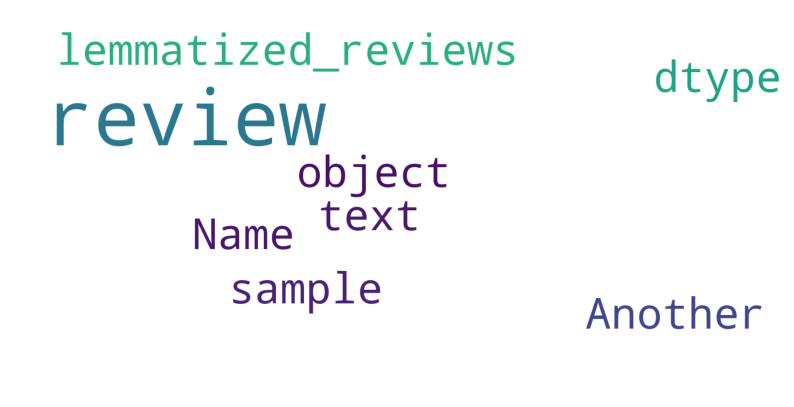

In [68]:
from wordcloud import WordCloud

def vizualize_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=200, max_font_size=40, scale=4, relative_scaling=0.9, random_state=7)
    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis("off")

    plt.imshow(wordcloud)
    plt.show()

vizualize_wordcloud(df["lemmatized_reviews"])